In [1]:
from collections import Counter
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn import metrics
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
ROOT_PATH = '/'.join(os.getcwd().split('/')[:-3])
DATA_PATH = f'{ROOT_PATH}/AI_study/dataset/Pocker'

idx2suit  = {1 : 'H', 2: 'S', 3 : 'D', 4 : 'C'}

In [3]:
df = pd.read_csv(f'{DATA_PATH}/train.csv')
df.head()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,hand
0,4,9,2,1,2,2,4,7,2,8,0
1,1,4,3,6,1,12,3,11,2,7,0
2,1,11,4,1,3,7,4,11,2,1,2
3,2,9,2,4,3,6,1,9,4,9,3
4,1,8,2,4,2,11,2,2,2,1,0


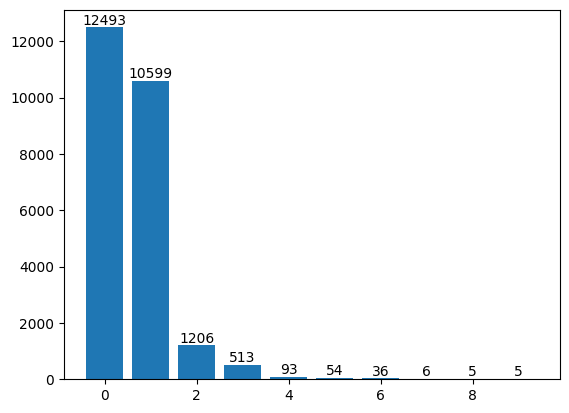

In [4]:
datas, label = df.drop(['hand'], axis = 1), df[['hand']]
label_count = label.value_counts('hand')

plt.bar(label_count.keys(), label_count.values)
for k, v in label_count.items():
    
    plt.text(
                k, v, v,
                verticalalignment   = 'bottom',
                horizontalalignment = 'center'
            )

In [5]:
sum_suits = sum([datas.value_counts(f'S{idx}') for idx in range(1, 6)])
sum_ranks = sum([datas.value_counts(f'C{idx}') for idx in range(1, 6)])

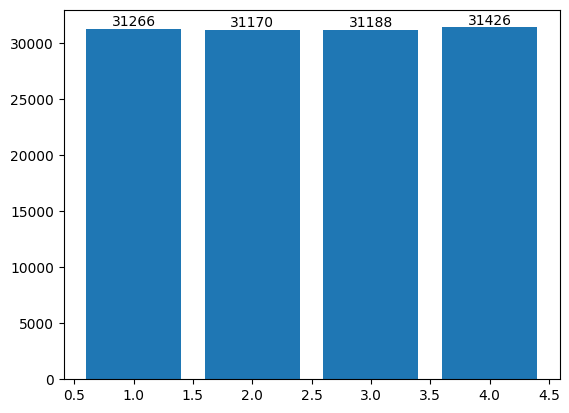

In [6]:
plt.bar(sum_suits.keys(), sum_suits.values)
for k, v in sum_suits.items():
    
    plt.text(
                k, v, v,
                verticalalignment   = 'bottom', 
                horizontalalignment = 'center'
            )

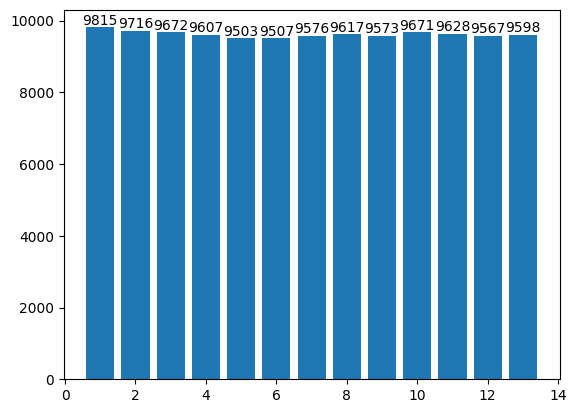

In [7]:
plt.bar(sum_ranks.keys(), sum_ranks.values)
for k, v in sum_ranks.items():
    
    plt.text(
                k, v, v,
                verticalalignment   = 'bottom', 
                horizontalalignment = 'center'
            )

In [8]:
new_data     = []
new_data_str = ''

encoder = LabelEncoder()

for data in datas.iterrows():
    
    _, series = data
    converted_data = [f'{idx2suit[series[f"S{idx}"]]}{series[f"C{idx}"]}' for idx in range(1, 6)]
    new_data.append(converted_data)

In [9]:
new_data[:5]

[['C9', 'S1', 'S2', 'C7', 'S8'],
 ['H4', 'D6', 'H12', 'D11', 'S7'],
 ['H11', 'C1', 'D7', 'C11', 'S1'],
 ['S9', 'S4', 'D6', 'H9', 'C9'],
 ['H8', 'S4', 'S11', 'S2', 'S1']]

In [10]:
new_data = np.array(new_data).reshape(-1, 1)

encoder = LabelEncoder()
encoder.fit(new_data)

encoded = encoder.transform(new_data)
encoded = encoded.reshape(-1, 5)

/opt/conda/envs/dove/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/envs/dove/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
